# **Preprocessing**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
import os
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from collections import Counter
from itertools import combinations

## **load data**

In [2]:
url = "https://drive.google.com/uc?id=1P_TP6H9TGj6tCZhwLo51qmLjTmQEfR9W"
df = pd.read_csv(url, encoding='latin1')

df.head()

,userName,content,score,thumbsUpCount,at,sortOrder,appId
0,Fiqi Amd,"Kualitas layanan aplikasi jelek, sudah ada bia...",1,129,10/3/2021 10:02,most_relevant,com.gojek.app
1,Rohman Tawon,Mankin menderita driver food . Pantes tiap mes...,1,109,10/4/2021 15:46,most_relevant,com.gojek.app
2,stevani Mei Phin,setelah saya upgrade aplikasi gojek nya kenapa...,1,12,10/5/2021 4:13,most_relevant,com.gojek.app
3,Muamar Al Farisy,Kecewa!!! Saya di tipu untuk transfer saldo go...,1,4,10/5/2021 4:33,most_relevant,com.gojek.app
4,Ramses Sng,Saya berulang kali gagal upgrade ke gopay plus...,1,7,10/1/2021 0:58,most_relevant,com.gojek.app


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360000 entries, 0 to 359999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   userName       360000 non-null  object
 1   content        359998 non-null  object
 2   score          360000 non-null  int64 
 3   thumbsUpCount  360000 non-null  int64 
 4   at             360000 non-null  object
 5   sortOrder      360000 non-null  object
 6   appId          360000 non-null  object
dtypes: int64(2), object(5)
memory usage: 19.2+ MB


mengambil nilai ke 105010 – 120011

In [4]:
subset_df = df.iloc[105010:120012]

subset_df

,userName,content,score,thumbsUpCount,at,sortOrder,appId
105010,Mukhid Zaenal,Sangat mudah dan bermanfaat,3,0,3/17/2021 6:47,newest,com.gojek.app
105011,Irwansyah99 Irwansyah,Mantap,3,0,3/17/2021 6:39,newest,com.gojek.app
105012,Dhilah _real,Kok aku gak bisa download sihh,3,0,3/17/2021 6:29,newest,com.gojek.app
105013,Nur Hayati,ok,3,0,3/17/2021 6:26,newest,com.gojek.app
105014,sefrit nenabu,"Mantap, bagus aplikasinya, tp bintang tiga dul...",3,8,3/17/2021 6:19,newest,com.gojek.app
...,...,...,...,...,...,...,...
120007,Ida San,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",4,0,9/30/2021 2:49,most_relevant,com.gojek.app
120008,Ridho ãã¾,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,4,132,9/27/2021 12:22,most_relevant,com.gojek.app
120009,Aang Kurniawan,Saya penguna gojek dari tahun 2019 tapi saya s...,4,3,9/20/2021 2:08,most_relevant,com.gojek.app
120010,HUG 2021,"Diskon selalu terpasang otomatis, tidak bisa k...",4,2,10/2/2021 23:33,most_relevant,com.gojek.app


In [5]:
subset_df.shape

(15002, 7)

In [6]:
subset_df.to_csv('../data/subset_data.csv', index=False)

In [7]:
df = pd.read_csv('../data/subset_data.csv')
df

,userName,content,score,thumbsUpCount,at,sortOrder,appId
0,Mukhid Zaenal,Sangat mudah dan bermanfaat,3,0,3/17/2021 6:47,newest,com.gojek.app
1,Irwansyah99 Irwansyah,Mantap,3,0,3/17/2021 6:39,newest,com.gojek.app
2,Dhilah _real,Kok aku gak bisa download sihh,3,0,3/17/2021 6:29,newest,com.gojek.app
3,Nur Hayati,ok,3,0,3/17/2021 6:26,newest,com.gojek.app
4,sefrit nenabu,"Mantap, bagus aplikasinya, tp bintang tiga dul...",3,8,3/17/2021 6:19,newest,com.gojek.app
...,...,...,...,...,...,...,...
14997,Ida San,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",4,0,9/30/2021 2:49,most_relevant,com.gojek.app
14998,Ridho ãã¾,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,4,132,9/27/2021 12:22,most_relevant,com.gojek.app
14999,Aang Kurniawan,Saya penguna gojek dari tahun 2019 tapi saya s...,4,3,9/20/2021 2:08,most_relevant,com.gojek.app
15000,HUG 2021,"Diskon selalu terpasang otomatis, tidak bisa k...",4,2,10/2/2021 23:33,most_relevant,com.gojek.app


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15002 entries, 0 to 15001
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   userName       15002 non-null  object
 1   content        15002 non-null  object
 2   score          15002 non-null  int64 
 3   thumbsUpCount  15002 non-null  int64 
 4   at             15002 non-null  object
 5   sortOrder      15002 non-null  object
 6   appId          15002 non-null  object
dtypes: int64(2), object(5)
memory usage: 820.6+ KB


## **cleaning**

proses cleaning:
- Menghapus karakter non-ASCII.
- Menghapus URL/link.
- Menghapus mention (kata yang diawali @).
- Menghapus simbol hashtag (#).
- Menghapus karakter selain huruf dan spasi.
- Menghapus angka.
- Mengurangi karakter berulang lebih dari dua menjadi satu.
- Mengganti spasi berlebih menjadi satu spasi.
- Menghapus spasi di awal dan akhir teks.
- Mengubah semua huruf menjadi huruf kecil.

In [9]:
def clean_text(text):
    text = text.encode('ascii', 'ignore').decode('ascii')
    text = re.sub(r'http\S+|www\.\S+', '', text)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'#', '', text)
    text = re.sub(r'[^a-zA-Z\s]', ' ', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text)
    text = text.strip()
    text = text.lower()
    return text

df['cleaned'] = df['content'].astype(str).apply(clean_text)
review = df[['content', 'cleaned']]
review

,content,cleaned
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat
1,Mantap,mantap
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh
3,ok,ok
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...
...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...


## **normalization**

proses normalisasi teks pada kolom 'cleaned' di dataframe review. Pertama, data kamus kata baku dan tidak baku dimuat dari file Excel, lalu dibuat dictionary kamus_dict untuk memetakan kata tidak baku ke kata baku. Fungsi normalize_text digunakan untuk mengganti setiap kata tidak baku dalam teks dengan padanan kata bakunya menggunakan kamus_dict. Fungsi ini diterapkan ke setiap baris pada kolom 'cleaned', dan hasilnya disimpan pada kolom baru 'normalized'. Dengan demikian, setiap kata tidak baku pada data telah diganti menjadi kata baku sesuai kamus yang tersedia, sehingga data teks menjadi lebih konsisten untuk analisis selanjutnya.

In [10]:
kamus = pd.read_excel('../data/kamuskatabaku.xlsx')
kamus_dict = dict(zip(kamus['tidak_baku'], kamus['kata_baku']))

def normalize_text(text):
    words = text.split()
    normalized_words = [kamus_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

review['normalized'] = review['cleaned'].apply(normalize_text)
review[['content', 'cleaned', 'normalized']]

C:\Users\MSI\AppData\Local\Temp\ipykernel_23988\2184515859.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['normalized'] = review['cleaned'].apply(normalize_text)


,content,cleaned,normalized
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat
1,Mantap,mantap,mantap
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih
3,ok,ok,ok
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...
...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...


## **stopwords removal**

membuat daftar stopwords bahasa Indonesia menggunakan Sastrawi, yang nantinya digunakan untuk menghapus kata-kata umum yang tidak memiliki makna penting dalam analisis teks. 

In [11]:
factory = StopWordRemoverFactory()
stopwords = factory.get_stop_words()
stopwords[:10]

['yang',
 'untuk',
 'pada',
 'ke',
 'para',
 'namun',
 'menurut',
 'antara',
 'dia',
 'dua']

mendefinisikan fungsi remove_stopwords untuk menghapus stopwords dari setiap teks pada kolom 'normalized' di dataframe review, lalu hasilnya disimpan pada kolom baru 'stopwords_removed'.

In [12]:
def remove_stopwords(text):
    words = text.split()
    filtered = [word for word in words if word not in stopwords]
    return ' '.join(filtered)

review['stopwords_removed'] = review['normalized'].apply(remove_stopwords)
review[['content', 'cleaned', 'normalized', 'stopwords_removed']]

C:\Users\MSI\AppData\Local\Temp\ipykernel_23988\2950772447.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['stopwords_removed'] = review['normalized'].apply(remove_stopwords)


,content,cleaned,normalized,stopwords_removed
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat
1,Mantap,mantap,mantap,mantap
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih
3,ok,ok,ok,
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...
...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...


## **stemming**

membuat objek stemmer bahasa Indonesia menggunakan library Sastrawi. Objek `stemmer` ini nantinya digunakan untuk melakukan stemming (mengubah kata ke bentuk dasarnya) pada teks.

In [15]:
stem_factory = StemmerFactory()
stemmer = stem_factory.create_stemmer()
stemmer

mendefinisikan fungsi `stem_text` untuk melakukan stemming pada setiap teks (baik list token maupun string). Fungsi ini kemudian diterapkan ke kolom `stopwords_removed` pada dataframe `review`, dan hasil stemming disimpan di kolom baru `stemmed`.

In [ ]:
def stem_text(text):
    return stemmer.stem(' '.join(text)) if isinstance(text, list) else stemmer.stem(text)

review['stemmed'] = review['stopwords_removed'].apply(stem_text)
review

C:\Users\MSI\AppData\Local\Temp\ipykernel_23988\2630433475.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['stemmed'] = review['tokens'].apply(stem_text)


,content,cleaned,normalized,stopwords_removed,tokens,stemmed
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,"[sangat, mudah, bermanfaat]",sangat mudah manfaat
1,Mantap,mantap,mantap,mantap,[mantap],mantap
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,"[kok, aku, download, sih]",kok aku download sih
3,ok,ok,ok,,[],
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,"[mantap, bagus, aplikasinya, bintang, tiga, du...",mantap bagus aplikasi bintang tiga dulu lah ub...
...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,"[oke, kalau, jam, jam, sore, susah, gojek, lam...",oke kalau jam jam sore susah gojek lama nunggu...
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,"[seru, seru, lah, orang, bukan, game]",seru seru lah orang bukan game
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,"[penguna, gojek, tahun, selalu, ganti, akun, s...",penguna gojek tahun selalu ganti akun sering k...
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,"[diskon, selalu, terpasang, otomatis, pilih, s...",diskon selalu pasang otomatis pilih sendiri pa...


## **Tokenization**

Pada tahap tokenisasi, setiap teks pada kolom `stemmed` di DataFrame `review` diubah menjadi daftar kata (token) dengan menggunakan fungsi `split()`. Proses ini dilakukan dengan menerapkan fungsi lambda pada setiap baris kolom `stemmed`, sehingga setiap kalimat yang telah melalui proses stemming akan dipecah menjadi list kata-kata penyusunnya. Hasil tokenisasi ini kemudian disimpan pada kolom baru bernama `tokens` di DataFrame `review`.

In [24]:
review['tokens'] = review['stemmed'].apply(lambda x: x.split())
review

,content,cleaned,normalized,stopwords_removed,stemmed,sentiment,label,tokens
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,sangat mudah manfaat,positive,1,"[sangat, mudah, manfaat]"
1,Mantap,mantap,mantap,mantap,mantap,positive,1,[mantap]
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,kok aku download sih,negative,-1,"[kok, aku, download, sih]"
3,ok,ok,ok,,,neutral,0,[]
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,mantap bagus aplikasi bintang tiga dulu lah ub...,negative,-1,"[mantap, bagus, aplikasi, bintang, tiga, dulu,..."
...,...,...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,oke kalau jam jam sore susah gojek lama nunggu...,negative,-1,"[oke, kalau, jam, jam, sore, susah, gojek, lam..."
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,seru seru lah orang bukan game,positive,1,"[seru, seru, lah, orang, bukan, game]"
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,penguna gojek tahun selalu ganti akun sering k...,negative,-1,"[penguna, gojek, tahun, selalu, ganti, akun, s..."
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,diskon selalu pasang otomatis pilih sendiri pa...,positive,1,"[diskon, selalu, pasang, otomatis, pilih, send..."


## **labelling**

pelabelan sentimen pada teks menggunakan pendekatan berbasis leksikon dengan memanfaatkan VADER (Valence Aware Dictionary and sEntiment Reasoner) yang telah dimodifikasi dengan kamus kustom.

In [18]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\MSI\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

- Pertama, objek `SentimentIntensityAnalyzer` dari library VADER diinisialisasi, dan leksikon bawaan VADER dihapus menggunakan `sia.lexicon.clear()` untuk digantikan dengan kamus kustom.
- Kamus kustom ini dibuat dengan menggabungkan dua sumber leksikon: InSet Lexicon yang berisi kata-kata positif dan negatif beserta bobotnya, serta SentiStrength yang menyediakan kata-kata dengan skor sentimen dalam format teks.
- Kedua leksikon ini digabung menjadi satu kamus dengan kata sebagai kunci dan bobot sentimen sebagai nilai. Kamus kustom ini diintegrasikan ke dalam VADER menggunakan `sia.lexicon.update()`.

In [19]:
sia = SentimentIntensityAnalyzer()
sia.lexicon.clear()

# Load INSET
inset_pos = pd.read_csv('../data/inset/positive.tsv', sep='\t')
inset_neg = pd.read_csv('../data/inset/negative.tsv', sep='\t')
lexicon_inset = {**dict(zip(inset_pos['word'], inset_pos['weight'])),
                 **dict(zip(inset_neg['word'], inset_neg['weight']))}

# Load sentistrength_id
senti_dict = {}
with open('../data/sentistrength_id/sentiwords_id.txt', encoding='utf-8') as f:
    for line in f:
        if ':' in line:
            word, score = line.strip().split(':')
            senti_dict[word] = float(score)

custom_lexicon = {**lexicon_inset, **senti_dict}
custom_lexicon = {k: float(v) for k, v in custom_lexicon.items()}
sia.lexicon.update(custom_lexicon)

- Selanjutnya, fungsi `vader_label` didefinisikan untuk menghitung skor sentimen gabungan (compound score) dari teks menggunakan `sia.polarity_scores()`.
- Berdasarkan skor ini, teks diberi label "positive" jika skor lebih besar dari 0, "negative" jika kurang dari 0, atau "neutral" jika sama dengan 0.

In [20]:
def vader_label(text):
    score = sia.polarity_scores(text)["compound"]
    if score > 0:
        return "positive"
    elif score < 0:
        return "negative"
    else:
        return "neutral"

review['sentiment'] = review['stemmed'].apply(vader_label)
review

C:\Users\MSI\AppData\Local\Temp\ipykernel_23988\2243861588.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  review['sentiment'] = review['stemmed'].apply(vader_label)


,content,cleaned,normalized,stopwords_removed,tokens,stemmed,sentiment
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,"[sangat, mudah, bermanfaat]",sangat mudah manfaat,positive
1,Mantap,mantap,mantap,mantap,[mantap],mantap,positive
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,"[kok, aku, download, sih]",kok aku download sih,negative
3,ok,ok,ok,,[],,neutral
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,"[mantap, bagus, aplikasinya, bintang, tiga, du...",mantap bagus aplikasi bintang tiga dulu lah ub...,negative
...,...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,"[oke, kalau, jam, jam, sore, susah, gojek, lam...",oke kalau jam jam sore susah gojek lama nunggu...,negative
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,"[seru, seru, lah, orang, bukan, game]",seru seru lah orang bukan game,positive
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,"[penguna, gojek, tahun, selalu, ganti, akun, s...",penguna gojek tahun selalu ganti akun sering k...,negative
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,"[diskon, selalu, terpasang, otomatis, pilih, s...",diskon selalu pasang otomatis pilih sendiri pa...,positive


In [21]:
label_map = {'positive': 1, 'negative': -1, 'neutral': 0}
review['label'] = review['sentiment'].map(label_map)
review

,content,cleaned,normalized,stopwords_removed,tokens,stemmed,sentiment,label
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,"[sangat, mudah, bermanfaat]",sangat mudah manfaat,positive,1
1,Mantap,mantap,mantap,mantap,[mantap],mantap,positive,1
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,"[kok, aku, download, sih]",kok aku download sih,negative,-1
3,ok,ok,ok,,[],,neutral,0
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,"[mantap, bagus, aplikasinya, bintang, tiga, du...",mantap bagus aplikasi bintang tiga dulu lah ub...,negative,-1
...,...,...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,"[oke, kalau, jam, jam, sore, susah, gojek, lam...",oke kalau jam jam sore susah gojek lama nunggu...,negative,-1
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,"[seru, seru, lah, orang, bukan, game]",seru seru lah orang bukan game,positive,1
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,"[penguna, gojek, tahun, selalu, ganti, akun, s...",penguna gojek tahun selalu ganti akun sering k...,negative,-1
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,"[diskon, selalu, terpasang, otomatis, pilih, s...",diskon selalu pasang otomatis pilih sendiri pa...,positive,1


In [25]:
review = review[['content', 'cleaned', 'normalized', 'stopwords_removed', 'stemmed', 'tokens', 'sentiment', 'label']]
review.head()

,content,cleaned,normalized,stopwords_removed,stemmed,tokens,sentiment,label
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,sangat mudah manfaat,"[sangat, mudah, manfaat]",positive,1
1,Mantap,mantap,mantap,mantap,mantap,[mantap],positive,1
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,kok aku download sih,"[kok, aku, download, sih]",negative,-1
3,ok,ok,ok,,,[],neutral,0
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,mantap bagus aplikasi bintang tiga dulu lah ub...,"[mantap, bagus, aplikasi, bintang, tiga, dulu,...",negative,-1


In [26]:
review.to_csv('../data/data_preprocessed.csv', index=False)

# **Visualization**

In [27]:
df = pd.read_csv('../data/data_preprocessed.csv')
df

,content,cleaned,normalized,stopwords_removed,stemmed,tokens,sentiment,label
0,Sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah dan bermanfaat,sangat mudah bermanfaat,sangat mudah manfaat,"['sangat', 'mudah', 'manfaat']",positive,1
1,Mantap,mantap,mantap,mantap,mantap,['mantap'],positive,1
2,Kok aku gak bisa download sihh,kok aku gak bisa download sihh,kok aku tidak bisa download sih,kok aku download sih,kok aku download sih,"['kok', 'aku', 'download', 'sih']",negative,-1
3,ok,ok,ok,NaN,NaN,[],neutral,0
4,"Mantap, bagus aplikasinya, tp bintang tiga dul...",mantap bagus aplikasinya tp bintang tiga dulu ...,mantap bagus aplikasinya tapi bintang tiga dul...,mantap bagus aplikasinya bintang tiga dulu lah...,mantap bagus aplikasi bintang tiga dulu lah ub...,"['mantap', 'bagus', 'aplikasi', 'bintang', 'ti...",negative,-1
...,...,...,...,...,...,...,...,...
14997,"Oke, tapi kalau jam 12 sampai jam 3 sore susah...",oke tapi kalau jam sampai jam sore susah dapat...,oke tapi kalau jam sampai jam sore susah dapat...,oke kalau jam jam sore susah gojek lama nunggu...,oke kalau jam jam sore susah gojek lama nunggu...,"['oke', 'kalau', 'jam', 'jam', 'sore', 'susah'...",negative,-1
14998,Seru!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!...,seru ga seru lah orang ini bukan game,seru tidak seru lah orang ini bukan game,seru seru lah orang bukan game,seru seru lah orang bukan game,"['seru', 'seru', 'lah', 'orang', 'bukan', 'game']",positive,1
14999,Saya penguna gojek dari tahun 2019 tapi saya s...,saya penguna gojek dari tahun tapi saya selalu...,saya penguna gojek dari tahun tapi saya selalu...,penguna gojek tahun selalu ganti akun sering k...,penguna gojek tahun selalu ganti akun sering k...,"['penguna', 'gojek', 'tahun', 'selalu', 'ganti...",negative,-1
15000,"Diskon selalu terpasang otomatis, tidak bisa k...",diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis tidak bisa ki...,diskon selalu terpasang otomatis pilih sendiri...,diskon selalu pasang otomatis pilih sendiri pa...,"['diskon', 'selalu', 'pasang', 'otomatis', 'pi...",positive,1


## **Proporsi**

sentiment
negative    53.532862
positive    31.255833
neutral     15.211305
Name: proportion, dtype: float64


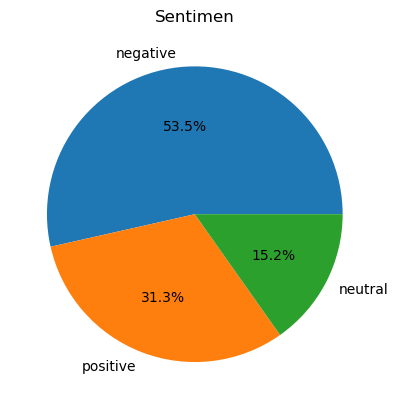

In [28]:
proporsi = review['sentiment'].value_counts(normalize=True) * 100
print(proporsi)

proporsi.plot.pie(autopct='%1.1f%%', ylabel='', title='Sentimen')
plt.show()

Sebanyak 53,5% ulasan diklasifikasikan sebagai "negative," menunjukkan mayoritas pendapat pengguna cenderung negatif. Proporsi "positive" mencapai 31,3%, mengindikasikan sebagian ulasan mengandung sentimen positif. Sementara itu, "neutral" menyumbang 15,2%, mencerminkan sebagian kecil ulasan yang tidak jelas cenderung ke arah positif atau negatif. Distribusi ini menunjukkan dominasi sentimen negatif dalam data ulasan Gojek pada waktu pengamatan, yang mungkin mencerminkan adanya keluhan atau ketidakpuasan yang lebih banyak diungkapkan oleh pengguna.

## **wordcloud**

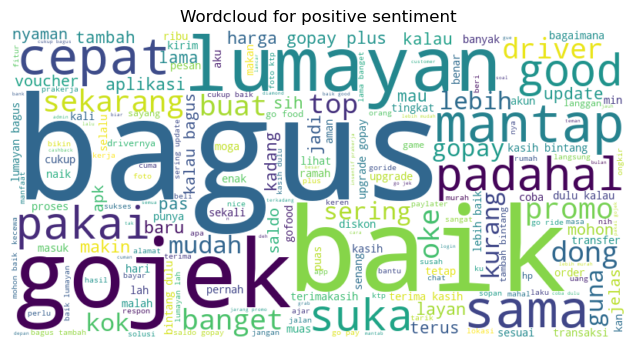

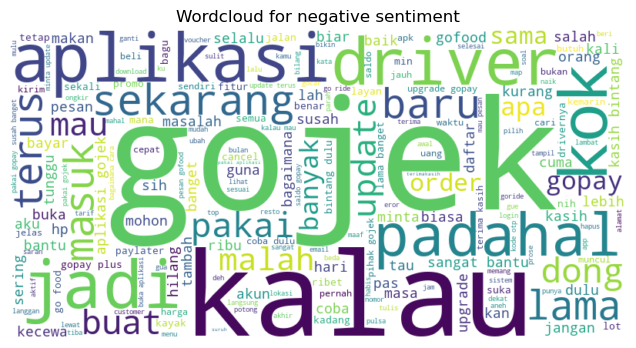

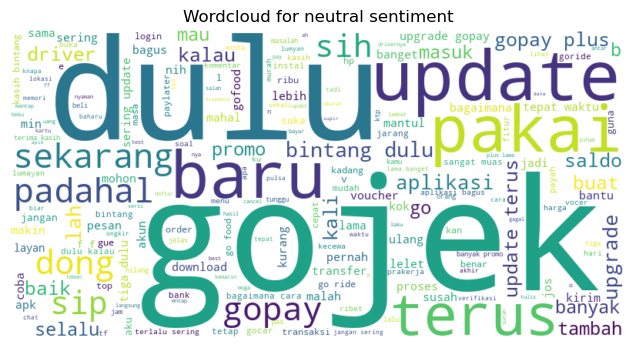

In [29]:
for label in ['positive', 'negative', 'neutral']:
    text = ' '.join(review[review['sentiment'] == label]['stemmed'])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(8, 4))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Wordcloud for {label} sentiment')
    plt.show()

## **Frekuensi**

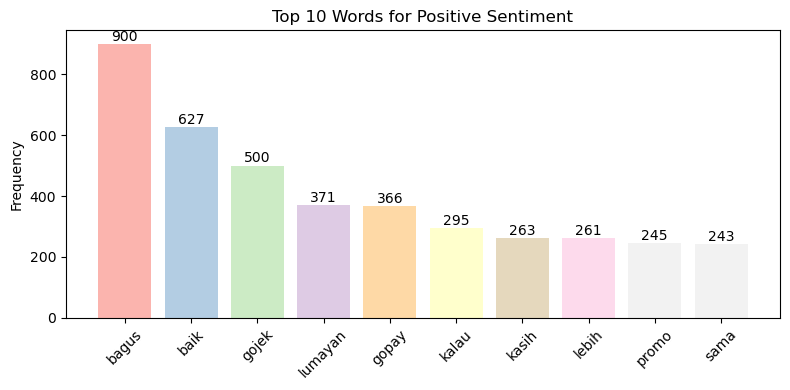

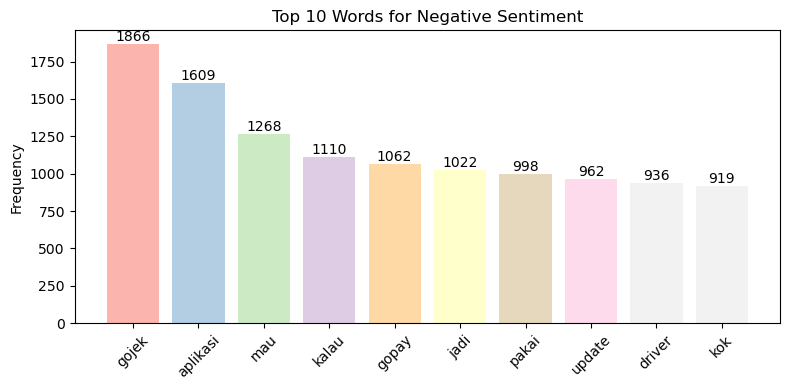

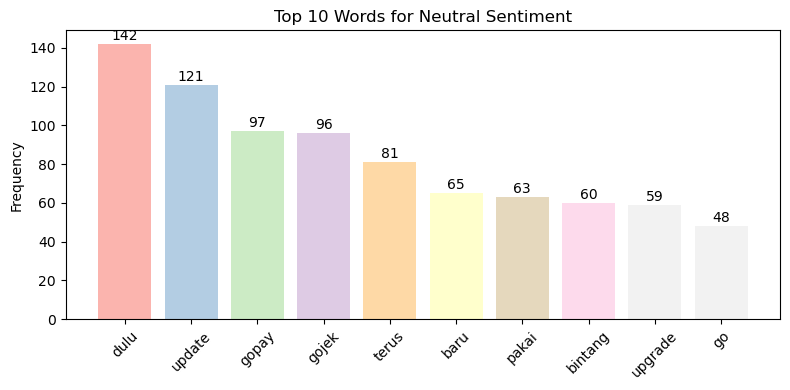

In [30]:
for label in ['positive', 'negative', 'neutral']:
    all_words = ' '.join(review[review['sentiment'] == label]['stemmed']).split()
    word_freq = Counter(all_words)
    top_words = word_freq.most_common(10)
    words, freqs = zip(*top_words)
    
    colors = plt.cm.Pastel1(range(len(words)))
    plt.figure(figsize=(8,4))
    bars = plt.bar(words, freqs, color=colors)
    plt.title(f"Top 10 Words for {label.capitalize()} Sentiment")
    plt.ylabel("Frequency")
    plt.xticks(rotation=45)
    
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 0.5, int(yval), ha='center', va='bottom', fontsize=10)
    
    plt.tight_layout()
    plt.show()

frekuensi kata dari kelas positif:
- Kata "bagus" memiliki frekuensi tertinggi dengan 900 kemunculan, menunjukkan bahwa ulasan positif sering kali mengandung pujian terhadap kualitas layanan.
- "baik" muncul 627 kali, mendukung sentimen positif dengan konotasi kepuasan.
- "gojek" (500 kali), "lumayan" (371 kali), "gopay" (366 kali), "kalau" (295 kali), "kasin" (263 kali), "lebih" (261 kali), "promo" (245 kali), dan "sama" (243 kali) juga sering muncul, menunjukkan konteks positif terkait merek, fitur pembayaran, atau penawaran khusus.

frekuensi kata dari kelas negatif:
- Kata "gojek" mendominasi dengan 1866 kemunculan, mengindikasikan bahwa keluhan sering kali terkait langsung dengan layanan atau merek tersebut.
- "aplikasi" (1609 kali) dan "mau" (1268 kali) menunjukkan masalah teknis atau ketidaksesuaian aplikasi sebagai sumber utama sentimen negatif.
- "kalau" (1110 kali), "gopay" (1062 kali), "jadi" (1022 kali), "pakai" (998 kali), "update" (962 kali), "driver" (936 kali), dan "kok" (919 kali) mencerminkan ketidakpuasan terkait pembayaran, pembaruan, atau performa pengemudi.

frekuensi kata dari kelas netral:
- "dulu" memiliki frekuensi tertinggi dengan 142 kemunculan, mungkin merujuk pada perbandingan masa lalu.
- "update" (121 kali), "gopay" (97 kali), "gojek" (96 kali), "terus" (81 kali), "baru" (65 kali), "pakai" (63 kali), "bintang" (60 kali), "upgrade" (59 kali), dan "go" (48 kali) menunjukkan diskusi netral terkait pembaruan, penggunaan, atau penilaian tanpa kecenderungan kuat ke positif atau negatif.


kesimpulan:
-Sentimen negatif didominasi oleh frekuensi kata yang jauh lebih tinggi (terutama "gojek" dan "aplikasi" dengan lebih dari 1500 kemunculan), mencerminkan jumlah keluhan yang signifikan.
- Sentimen positif memiliki frekuensi kata lebih rendah (maksimum 900 untuk "bagus"), menunjukkan ulasan positif kurang dominan.
- Sentimen netral memiliki frekuensi terendah secara keseluruhan (maksimum 142 untuk "dulu"), dengan kata-kata yang lebih netral seperti "update" dan "gopay" muncul di semua kategori, menunjukkan konteks yang bergantung pada penggunaan.
- Kata seperti "gojek," "gopay," dan "update" muncul di ketiga kelas, menunjukkan bahwa persepsi terhadap layanan, pembayaran, dan pembaruan bervariasi tergantung konteksnya.